## Intro
#### Amarjit M - 106120011
#### Dharanish Rahul S - 106120031
#### Mithilesh K - 106120069

In [1]:
# importing libraries.

import numpy as np
import pandas as pd
pd.set_option('display.float_format', '{:.2f}'.format)
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', None)

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')
sns.set(font_scale = 1.5)
import plotly.express as px

import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, f1_score
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import LocalOutlierFactor

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# reading the data and showing a sample of it.
d = pd.read_csv('/content/drive/MyDrive/eon_downsized.csv',encoding = "ISO-8859-1")
d.head()

,v1,v2,Message-ID,Unnamed: 3,To,Randomized_serialNo
0,0,traveling business meeting takes trip especial...,<15464986.1075855378456.JavaMail.evans@thyme>,NaN,john.lavorato@enron.com,1
1,0,following distribution list updates phillip al...,<16254169.1075863688286.JavaMail.evans@thyme>,NaN,"david.l.johnson@enron.com, john.shafer@enron.com",6
2,0,high speed internet access login pallen davis ...,<20641191.1075855687472.JavaMail.evans@thyme>,NaN,mark.scott@enron.com,8
3,0,consolidated positions issues list forwarded p...,<13116875.1075855687561.JavaMail.evans@thyme>,NaN,keith.holst@enron.com,12
4,0,investment structure forwarded phillip allen g...,<19034252.1075855687825.JavaMail.evans@thyme>,NaN,kholst@enron.com,25


In [4]:
# filtering the data.
d = d.iloc[:,:2].rename(columns = {'v1':'label', 'v2':'text'})
d.tail()

,label,text
101583,1,dynegy discussions enron dynegy announced toda...
101584,1,updated enrononline application sales team upd...
101585,1,meeting delayed hello meeting originally sched...
101586,1,cocksucker yahoo send free holiday greetings o...
101587,1,enron works enron line markets disclosure orig...


In [5]:
# showing brief information about the dataset.
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101588 entries, 0 to 101587
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   label   101588 non-null  int64 
 1   text    101414 non-null  object
dtypes: int64(1), object(1)
memory usage: 1.6+ MB


In [6]:
# Showing some describtive statistics about the data.
d.describe()

,label
count,101588.00
mean,0.01
std,0.11
min,0.00
25%,0.00
50%,0.00
75%,0.00
max,1.00


### How many spam emails are there?

In [7]:
px.pie(d,'label')

### What is the distribution of length for each email type?

In [8]:
d['text'] = d['text'].astype(str)
d['length'] = d.text.apply(len)
for u in d['label'].unique():
    print(f'Average {u} length = {round(d[d.label==u].length.mean(),2)}')
    print(f'Most frequent {u} length = {round(d[d.label==u].length.mode()[0],2)}')
px.histogram(d,x='length', color = 'label')

Average 0 length = 889.67
Most frequent 0 length = 176
Average 1 length = 897.89
Most frequent 1 length = 3331


### Preprocessing:

In [9]:
d.label = LabelEncoder().fit_transform(d.label)
d.head()

,label,text,length
0,0,traveling business meeting takes trip especial...,402
1,0,following distribution list updates phillip al...,186
2,0,high speed internet access login pallen davis ...,88
3,0,consolidated positions issues list forwarded p...,3484
4,0,investment structure forwarded phillip allen g...,4897


In [10]:
X_train, X_valid, y_train, y_valid= train_test_split(d['text'], d['label'], test_size=0.2, random_state=0)
X_train.head()

94241     urgent request long coal lawyers approved cont...
9410      waiver benefits michelle attachment original m...
101023    assets trading dave believe flexible model pro...
1183      dave reminder send list grandchildren products...
4683      global standard valuation methodology changes ...
Name: text, dtype: object

In [11]:


tfv = TfidfVectorizer(stop_words='english')

tfv_train = tfv.fit_transform(X_train)
tfv_valid= tfv.transform(X_valid)

tfv_train.shape

(81270, 163710)

In [12]:
def best_estimator(estimator, params, X_train = tfv_train, y_train_ = y_train, scorer = None):

    grid = GridSearchCV(estimator, params, scoring= scorer)
    grid.fit(X_train, y_train_)

    bestEstimator = grid.best_estimator_
    print(f'Best estimator: {bestEstimator}')

    CVscore = cross_val_score(bestEstimator, X_train, y_train_, cv=5, scoring= scorer)
    print('Cross Validation Score: ', round(CVscore.mean() * 100, 2).astype(str) + '%')

    return bestEstimator

def cf(model, X_valid = tfv_valid, y_valid_ = y_valid):

    y_pred = model.predict(X_valid)
    confusionMatrix = confusion_matrix(y_valid_, y_pred)

    sns.heatmap(confusionMatrix, annot=True, fmt='g', cbar=False, cmap='PiYG')
    plt.xlabel('Predicted Values')
    plt.ylabel('Actual Values')
    plt.show()

### Logistic Regression

In [13]:
log_reg_params = {"penalty": ['l1', 'l2'],
                  'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

log_reg = best_estimator(LogisticRegression(), log_reg_params)

Best estimator: LogisticRegression(C=100)
Cross Validation Score:  99.4%


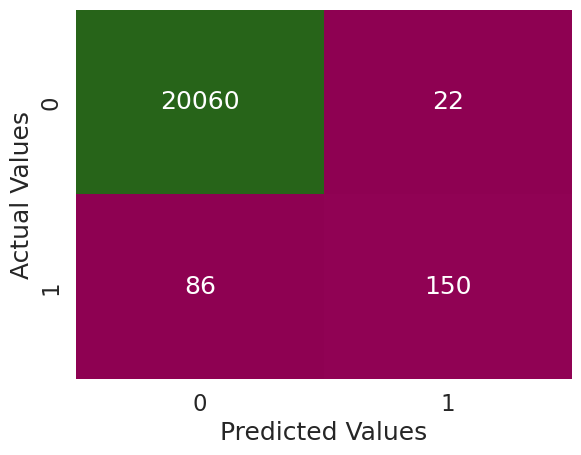

In [14]:
cf(log_reg)

### KNN

In [ ]:
knears_params = {"n_neighbors": list(range(1,30,5))}

knears_neighbors = best_estimator(KNeighborsClassifier(), knears_params)

In [ ]:
cf(knears_neighbors)

##### From my perspective, I believe that the KNN model is doing better than the LR model regarding our problem here, though its cross validation is lower and false nigatives are higher, as I'd give the higher priority to ham emails not being classified as spam emails and not the opposite.

### Random Forest

In [ ]:
# random_params = {'n_estimators': [100, 200, 500],
#                  'min_samples_split': [2, 5],
#                  'bootstrap': [True, False]}

# RF = best_estimator(RandomForestClassifier(), random_params)

RF = RandomForestClassifier(n_estimators=500, min_samples_split = 5, bootstrap = False).fit(tfv_train, y_train) # this was the beast estimator.
CVscore = cross_val_score(RF, tfv_train, y_train, cv=2)
print('Cross Validation Score: ', round(CVscore.mean() * 100, 2).astype(str) + '%')

Cross Validation Score:  97.91%


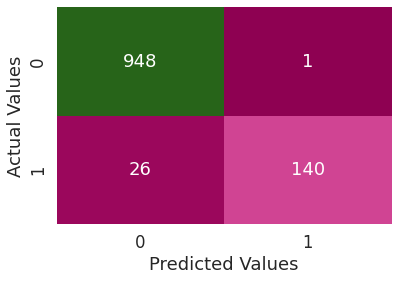

In [ ]:
cf(RF)

### XGB

In [15]:
# xgbparams = {'n_estimators': [100, 500, 1000],
#     'learning_rate': [0.01,0.05,0.1],
#     'booster': ['gbtree', 'gblinear'],
#     'reg_alpha': [0, 0.5, 1],
#     'reg_lambda': [0.5, 1]}

# xgb = best_estimator(XGBClassifier(n_jobs=-1), xgbparams)

xgb = XGBClassifier(n_jobs=-1,n_estimators=1000,learning_rate=0.1,booster='gbtree',reg_alpha=0.5, reg_lambda=1).fit(tfv_train, y_train)
CVscore = cross_val_score(xgb, tfv_train, y_train, cv=5)
print('Cross Validation Score: ', round(CVscore.mean() * 100, 2).astype(str) + '%')

Cross Validation Score:  99.49%


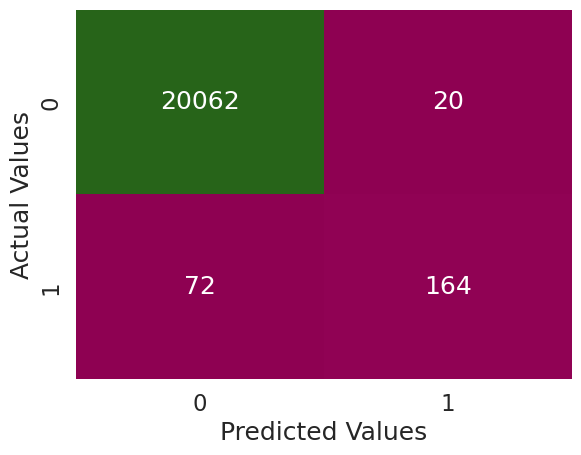

In [16]:
cf(xgb)

## ALL DONE!
for classification
### LocalOutlierFactor Testing

In [ ]:
d['label'][d.label == 1] = -1
d['label'][d.label == 0] = 1
text = tfv.fit_transform(d['text'])

LOF = LocalOutlierFactor(n_neighbors=23, contamination=0.1)
LOFpred = LOF.fit_predict(text)

n_true_preds = (LOFpred==d['label'].values).sum()
n_true_preds

In [ ]:
accuracy = n_true_preds/len(d['label'].values)
accuracy

In [ ]:
LOFpred_series = pd.Series(LOFpred)
LOFpred_series[LOFpred_series == 1] = 0
LOFpred_series[LOFpred_series == -1] = 1

d['label'][d.label == 1] = 0
d['label'][d.label == -1] = 1

In [ ]:
confusionMatrix = ((confusion_matrix(d['label'], LOFpred_series))*0.2).round()

sns.heatmap(confusionMatrix, annot=True, fmt='g', cbar=False, cmap='PiYG')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

##### The LocalOutlierFactor detector classified 4521 (81%) emails right by just the text of the email (without any learning from the target unlike the classifiers).